*So the first thing you want to do is open up a new notebook. Navigate to where you want to save it on the Jupyter Notebook main menu.  Then make sure you give it a title, and make sure you organize yourself by telling the purpose of the notebook up front. In this case, you will be doing a single sample t-test on some data from the PGA.  This dataset covers all events from 2010-2018, and you are looking to test whether a fairway perecentage of 60 seems typical for this data. Remember that you will use a single sample t-test when you are trying to determine whether a particiular value has come from the population.*

# To determine whether a fairway percentage of 60 came from this population, using a *single sample t-test*.

*Next, you need to import all the packages you'll be using.  It's usually nice to have them all in one block up top, to save space and to organize yourself. If you realize halfway through your analysis that you've forgotten something, that's ok - you can just come back to the top and add it, then run the cell again. In this case, you will need pandas to import data and look at a basic histogram, and you will need stats and norm from scipy to do the t-tests. Including numpy is just always a good idea!*

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy import stats

*Now that you have those all imported, you will need to also load in your data. This data is a CSV, so you can use the function pd.read_csv* 

In [3]:
golf = pd.read_csv('C:/Users/meredith.dodd/Documents/Data Science/105 Intermediate Statistics/Lesson 1/pgaTourData.csv')

In [4]:
golf.head()

,Player Name,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
0,Henrik Stenson,60.0,75.19,2018,291.5,73.51,29.93,60.67,69.617,868,NaN,5.0,-0.207,1.153,0.427,0.960,-0.027,"$2,680,487"
1,Ryan Armour,109.0,73.58,2018,283.5,68.22,29.31,60.13,70.758,"1,006",1.0,3.0,-0.058,0.337,-0.012,0.213,0.194,"$2,485,203"
2,Chez Reavie,93.0,72.24,2018,286.5,68.67,29.12,62.27,70.432,"1,020",NaN,3.0,0.192,0.674,0.183,0.437,-0.137,"$2,700,018"
3,Ryan Moore,78.0,71.94,2018,289.2,68.80,29.17,64.16,70.015,795,NaN,5.0,-0.271,0.941,0.406,0.532,0.273,"$1,986,608"
4,Brian Stuard,103.0,71.44,2018,278.9,67.12,29.11,59.23,71.038,421,NaN,3.0,0.164,0.062,-0.227,0.099,0.026,"$1,089,763"


*Now it is time to test your assumptions. The only assumption for a single sample t-test is that the data should be normally distributed. This can easily be tetsed with a histogram.  Though there are fancier histogram packages, the one in pandas is easy to use and needs less wrangling typically.  That code is just .hist() after you have specified your dataframe name adn variable name*

## Test Assumptions

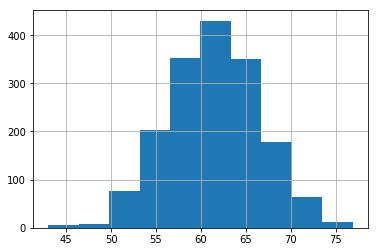

In [8]:
golf['Fairway Percentage'].hist()

*Alright.  This looks roughly normally distributed, so you are good to proceed!*

*Now it's time to run the analysis. You will use the function stat.ttest_1samp() to test.*

## Run the Analysis

In [15]:
stats.ttest_1samp(golf['Fairway Percentage'], 60)

Ttest_1sampResult(statistic=3.7303160457242943, pvalue=0.0002311972962950221)

*Uh oh! See how you got Nan here? That's because there is missing data.  The analysis will technically run, but it won't give you any results.  The good news is that it is an easy fix, though. There is code for removing missing data in pandas - the function dropna, used with the argument inplace=True Now it's really important to keep things organized and easily labeled, so go ahead and start a new section above your assumptions for data wrangling*

## Data Wrangling - Remove Missing Data

In [11]:
golf.dropna(inplace=True)

*The inplace=True argument is really important here, because that is what makes the change permanent.  If you don't use inplace=True, then you will need to drop NAs every single time and sometimes the stats won't even run because your drop NAs  command has alreayd run out.  However, you should note that because this code is permanent, you cannot run it more than once.*

*Alright.  Now that you've dropped NAs, you can go ahead and try and run your test again.  You don't need to retype anything or copy and paste, you can just go up to the previous cell and re-run it. This works because you have made sure to keep everything in order by putting your drop code up top. Keeping things in order is really important, because every time you close a Jupyter Notebook, you have to re-run all the code after you've opened it again.  So you want things to be easy and in order, so you can select run all instead of scrolling up and down and selecting certain boxes to run at certain times.  It also lets you and your coworkers better follow the trail of what you were doing.*

*And tada! You get results this time that are more real.  Looks like a fairway percentage of 60 is significantly different than the population for PGA.But how is your population different? Is it higher or lower than 60? Well, the only way to find out is to look at means.*

*Go ahead and use the .mean() function in pandas.  If you have a column name with no spaces, then you can just do a period after the dataframe name and put your column in.  But in this case, there is a space between Fairway and Percentage, so you leave off the period separator and instead surround the column name with brackts and quotes.  Then you can call .mean() at the end.*

In [17]:
golf['Fairway Percentage'].mean()

61.06745583038865

*So it looks like the average for the dataset, which is your population, is 61.  You were testing a value of 60%, and so you can say that your value of 60% is significantly lower than the population.*